# Jupyter and Python

This recitation exercise is designed to introduce the Jupyter Environment and basic Python conventions and syntax. Here is an overview of the topics:

* Base Python vs. Numpy (lists vs. arrays)
* 1D arrays, columns, rows, and matrices
* Basic math operators in Python 
* Functions
* For Loops, While Loops
* Element-wise operations (broadcasting) vs. matrix operations
* Logical values and conditional statements
* Plotting

## Scalars and Types

A scalar represents a single value of some kind (integer, floating point decimal, Boolean, string, etc.)  We need to recognize that there are different types of scalar quantities and that, e.g., an integer and floating point decimal are different things.

In [1]:
S1 = 1
S1
type(S1)

int

## Lists and Numpy Arrays

We frequently need to store many quantities inside of some type of collection. If we're going to work in Python, we might choose to do this using ***lists*** or ***numpy arrays***, so it is immportant to understand the differences between them.  It is easy to confuse these two types of data structures since they look similar, and we create them in similar ways.  But they have important differences.  We will *usually* work with numpy arrays in this course, but it is also important for us to understand lists for several reasons. First, to understand why a numpy array is preferred for the types of things we do in 587, we need to first understand how lists work; this takes some of the mystery out of deciding which type of structure we should work with. Second, we (often) construct numpy arrays using lists as inputs. Finally, there are many packages in Python that will use lists as their default input or output structure for data, so we should be familiar with them.

### Lists

When working with data, functions, and various types of analysis, we generally need to be able to store sets or collections of values instead of just scalars. In the base Python environment, we *usually* default to using lists when we need to store a collection of things. 

#### Making a List

If you are familiar with Matlab syntax, creating a simple list is very similar to creating a row array in Matlab.  For example, if we wanted to create a list containing the integers 1 to 5, we would do so as follows:

```{note}
Is everyone comfortable with indexing in Python to access specific elements?  Remember: Python is zero-indexed, which means the first element of any collection has an index of 0. 
```

In [2]:
L1 = [1, 2, 3, 4, 5]
%whos
L1[3]
dir(L1)
L1.reverse()
L1
L1.sort()
L1

Variable   Type    Data/Info
----------------------------
L1         list    n=5
S1         int     1


[1, 2, 3, 4, 5]

#### The print command

We can display the contents of that list and the length of that list.  We'll also display the type.

```{tip}
Python only displays the output of the last operation performed; if you want to see a value, you usually have to print it.
```

In [3]:
print(L1)
print(len(L1))
print(type(L1))

[1, 2, 3, 4, 5]
5
<class 'list'>


#### Despite appearances, lists are not rows, columns, or matrices

This *looks* like a row vector compared to what we are probably used to from Matlab, but it has very different properties.  Technically, it is a 1 dimensional object (it only has a length associated with it), whereas rows, columns, and matrices are 2D objects (they have both row and column dimensions).

Let's say we wanted to store a "2D" set of information in lists; we would do so by constructing a list of lists:

In [4]:
L2 = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

If we print that list, we find it *looks* like a matrix:

In [5]:
print(L2)

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]


However, if we ask for the length of that list, we find that it is only 2 elements long:

In [6]:
len(L2)

2

It is **not** a 2x5 matrix, and if we tried to index it like a matrix (row, column), we get an error:

In [7]:
L2[0,0]

TypeError: list indices must be integers or slices, not tuple

If we wanted to access information in that list, we have to remember that it is not a matrix, but a list of lists...so if I wanted to recall the number 5, for example, from L2, that is not indexed as:

```python
L2[0,4]  #5th column in first row of L2
```
    
As you might do in Matlab; rather, it is indexed as:

```python
L2[0][4] #5th element in first list of L2
```

In [8]:
# L2[0,4]
L2[0][4]

5


```{caution}
Lists are not matrices, and they do not index or behave like matrices. Please do not try to use a list as a matrix!
```

#### Creating large lists with the range command

If we want to create a large list, such as the full set of integers between 1 and 50, we generally won't type it out.  Instead, we'll pass the `range()` function into the `list()` constructor.  The basic syntax of range is:

```python
range(start, stop+1, step size)
```

So for this example:

In [9]:
L = list(range(1, 51, 1))
print(L)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


### Numpy Arrays

If we want a matrix like environment (and we'll see some reasons for this below), this is best handled in Python using numpy arrays.  This is not in base Pyton -- we have to import the numpy package to gain access to numpy arrays.    

```{tip}
Aliasing: The cell below imports the package "numpy" under the alias "np."  So anywhere we'd normally call the package using "numpy," we can replace that with "np" instead.
```

In [10]:
import numpy as np

#### Making a numpy array

We create numpy arrays as in the following example.  Here, we create a 1D numpy array that contains the integers 1 to 5 (similar to the list above). Numpy arrays are created passing a list into the `np.array()` constructor. It is going to be very important to remember this when we create 2D arrays (similar to a matrix) or higher dimensional arrays.

In [11]:
print(L1)

[1, 2, 3, 4, 5]


In [12]:
A1 = np.array([1, 2, 3, 4, 5]) #equivalent to np.array(L1)
A1 = np.array(L1)
print(A1)
%whos
A1[0]
L1[0]

[1 2 3 4 5]
Variable   Type       Data/Info
-------------------------------
A1         ndarray    5: 5 elems, type `int64`, 40 bytes
L          list       n=50
L1         list       n=5
L2         list       n=2
np         module     <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>


1

#### Examining the numpy array

Let's print that array and check it's properties and dimensions; we'll compare it to the analogous list and consider some of the differences.

In [13]:
print(L1)
print(len(L1))
print(type(L1))
print()
print(A1)
print(len(A1))
print(type(A1))

[1, 2, 3, 4, 5]
5
<class 'list'>

[1 2 3 4 5]
5
<class 'numpy.ndarray'>


#### Numpy arrays have a lot of useful features built into them

Looking at numpy arrays, we can see that they have a lot more attributes than lists do; many of these are useful in mathematics, statistics, and engineering.  We can also use them to assess the size and shape of our arrays.

In [14]:
dir(A1)
print(A1.max())
print(A1.min())
print(A1.size)
print(A1.shape)
print(A1.ndim)

5
1
5
(5,)
1


#### 2D and nD Arrays

With numpy arrays, we can actually create 2D or higher dimensional structures (3D, 4D, etc.)  We'll mostly stick with 1D and 2D in CEN 587.  For example, let's recreate that list of lists above as a numpy array using the array constructor.

The key thing to remember when you are creating a 2D array is that you still use the basic `np.array()` constructor syntax:

```python
np.array([])
```

But **every row in the array should be entered into the `np.array()` constructor as a list**.

This is implemented below. If you look closely at this, you'll see that the first "element" in that array is the list [1, 2, 3, 4, 5], and the second element is the list [6, 7, 8, 9, 10].  These "elements" in a numpy array correspond to rows in a matrix, so when you're creating a matrix, you enter each row as a separate list.  Each list should be separated by a comma.

In [15]:
A2 = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]) #equivalent to np.array(L2)
print(A2)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


Now we'll look at that array and some of its associated properties and dimensions:

In [16]:
print(L2)
print(len(L2))
print(type(L2))
print()

print(A2)
print(len(A2))
print(type(A2))
print(A2.size)
print(A2.shape)
print(A2.ndim)

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
2
<class 'list'>

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
2
<class 'numpy.ndarray'>
10
(2, 5)
2


#### Indexing in numpy arrays

With a numpy array, we have the option of indexing it as we would a matrix using [row, column] indexing, so, with this numpy array, if I wanted to grab the fifth column in the first row, I can do using matrix-style, [row, column]:

    A2[0,4]  #5th column in first row
    
ND arrays also support list-type indexing:

    A2[0][4] #5th element in first element

So: a numpy array has size, shape, and index options that are similar to what we are probably used to with Matlab matrices.  Lists do not translate directly to matrix format.

In [17]:
print(A2[0,4])  #5th column in first row
print(A2[0][4]) #5th element in first element

5
5


#### 1D arrays vs. Rows and Columns

If you are coming from a Matlab background, you are used to thinking of "vectors" of numbers or entries as either rows (horizontal set of values) or columns (vertical set of values).  It is important to remember that rows and columns are 2-dimensional structures -- they both have a length (number of rows) and width (number of columns) associated with them. Specifically, a column is m rows x 1 column...and a row is 1 row x n columns.  **These are 2D structures** and they have the corresponding shapes associated with them. Whereas Matlab creates rows and columns by default using brackets [], commas, spaces, or semicolons, Python is slightly different.

Let's go back to our original set of integers from 1 to 5.  If I create a numpy array and print its values as well as its dimensions and shape, we will find that it is a true 1 dimensional structure.  It is a "line" of values, and it is neither a row or column in that it has no horizontal or vertical orientation associated with it.  This is what the somewhat strange notation (5,) communicates to us.  There is no 2nd dimension.

In [18]:
A1 = np.array([1, 2, 3, 4, 5])
print(A1)
print(A1.ndim)
print(A1.shape)

[1 2 3 4 5]
1
(5,)


Usually, we'll be fine working with 1D arrays.  They will typically behave either as a row or a column depending on context (if we need them to).  If we ever specifically need to create a row or a column, we have to deliberately create a 2D array.  For example, recreating that 1D array as a row is implemented in the cell below. Look at it closely and you'll see that we're still passing a list into the `np.array()` constructor with `[]`, and the first element in that list is another list enclosed in an additional set of `[]`.  This is how you create 2D arrays in Python with `np.array()`.

We'll also print important aspects as usual:

In [19]:
R1 = np.array([[1, 2, 3, 4, 5]])
print(R1)
print(R1.shape)
print(R1.ndim)

[[1 2 3 4 5]]
(1, 5)
2


Now, you see that we have a true row of shape (1, 5), i.e., 1 row and 5 columns.

In contrast, if we really need a column, we would have to create it as in the cell below (again, as a 2D array). Again, you'll notice that we're passing a list into an `np.array()` constructor using a set of values enclosed in `[]`.  In this case, each element in that list is also a separate list enclosed in brackets `[]`, and I've created several rows by entering every value as its own list separated by commas.  With numpy arrays, each new "list" separated by commas creates a new row, so in this example, we've made a 2D column with 5 rows.

In [20]:
C1 = np.array([[1], [2], [3], [4], [5]])
print(C1)
print(C1.ndim)
print(C1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]]
2
(5, 1)


More often than not, we only need to work with 1D arrays and 2D matrices, but it is important to understand what these shapes mean.  I found myself initially very confused by 1D arrays when I switched from Matlab to Python, so I thought the explanation was worthwhile.  If we run into an occasion where we actually need a row or a column, we'll discuss why it is necesssary in that particular situation. Most of the time, 1D numpy arrays will suffice where we think we need a row or a column.

#### Tools for creating large numpy arrays

We want to create a 1D numpy array, A, that has the numbers 1 through 50 in it. We can do this in at least three ways:

Write out the integers 1 to 50 separated by commas in an np.array constructor (not recommended).

```python
A = np.array([1, 2, 3, 4, 5, ... , 48, 49, 50])
```

Use `np.arange()` (good option, but it returns integers by default. Can also be flaky with non-integer step sizes).

```python
A = np.arange(start, stop+1, step size) #same as np.array(range(start, stop+1, step size)) for int  
```
  
Use `np.linspace()` to construct the array (returns floats; usually what we want; probably most useful option).

```python
A = np.linspace(start, stop, number of elements in collection)

```

In [22]:
A = np.linspace(1, 50, 50) #array of floating point decimals from 1 to 50 in 50 steps.
# A = np.arange(1, 51, 1) #array of integers from 1 to 50 with a step size of 1, same as np.array(range(1, 51, 1))
# A = np.arange(1, 51, 1, dtype = int)
# A = np.arange(1, 51, 1, dtype = float) #Roughly equivalent to np.linspace(1, 50, 50)
print(A)
print(type(A[0]))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
<class 'numpy.float64'>


### Lists vs. arrays in practice (math!)

As a simple demonstration, let's just try a few basic math operations on our 50 element array, A, and our 50 element list, L.

In [25]:
A = np.linspace(1, 50, 50)
print(A, '\n') #'\n' adds a new line, effectively this is a "return" command
L = list(range(1, 51, 1))
print(L)

A + 5
# L + 5
L + [5]
A*5
L*5
A**2  #A squared
# L**2  #L squared

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


array([1.000e+00, 4.000e+00, 9.000e+00, 1.600e+01, 2.500e+01, 3.600e+01,
       4.900e+01, 6.400e+01, 8.100e+01, 1.000e+02, 1.210e+02, 1.440e+02,
       1.690e+02, 1.960e+02, 2.250e+02, 2.560e+02, 2.890e+02, 3.240e+02,
       3.610e+02, 4.000e+02, 4.410e+02, 4.840e+02, 5.290e+02, 5.760e+02,
       6.250e+02, 6.760e+02, 7.290e+02, 7.840e+02, 8.410e+02, 9.000e+02,
       9.610e+02, 1.024e+03, 1.089e+03, 1.156e+03, 1.225e+03, 1.296e+03,
       1.369e+03, 1.444e+03, 1.521e+03, 1.600e+03, 1.681e+03, 1.764e+03,
       1.849e+03, 1.936e+03, 2.025e+03, 2.116e+03, 2.209e+03, 2.304e+03,
       2.401e+03, 2.500e+03])

Now we'll create a second 1D array, B, that has the numbers 2 through 100 in increments of 2.

In [26]:
B = np.linspace(2, 100, 50)
print(B)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]


#### Element-wise calculations are easy with arrays

Let's take advange of element-wise operations (broadcasting) in numpy arrays to:

1. Multiply each element in A by each element in B 
2. Raise each element in A to the third power
3. Find the exponential of the cube root of each element in A
4. Divide each element in B by each element in A

Each should give a 50 element vector (why?)

In [28]:
A*B # * = elementwise multiplication
A**3 # ** = elementwise power
# exp(A**(1/3))
np.exp(A**(1/3))
B/A # / = elementwise division

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

#### Basic Matrix Operations (Optional)

Now we'll get a look at Matrix operations in Python. To perform a matrix operation on something, we usually need a 2D array, so we'll use our rows and columns for this.

1. Look at the difference between C1 and its transpose. #use `np.transpose(C1)` or `C1.T`
2. Look at the difference between R1 and its transpose. #use `np.transpose(R1)` or `R1.T`
3. Multiply C1 by C1$^T$ - this should give a 5x5 array (why?) #use `C1@C.T`
4. Multiply R1 by R1$^T$ - this should give a 1x1 array (why?)       #use `R1@R.T`

In [29]:
print(C1, '\n') 
print(C1.T, '\n')
print(R1, '\n')
print(R1.T, '\n')
print(C1@C1.T, '\n') # @ is matrix multiplication whereas * is elementwise multiplication
print(R1@R1.T)

[[1]
 [2]
 [3]
 [4]
 [5]] 

[[1 2 3 4 5]] 

[[1 2 3 4 5]] 

[[1]
 [2]
 [3]
 [4]
 [5]] 

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]] 

[[55]]


#### Introducing `np.zeros()` and `np.ones()`

You can use np.zeros to create an array of zeros; here, we'll create a 3x5 array of zeros.

```python
np.zeros(shape) #Shape should be a collection (list, tuple, np.array, etc.).
```

```{tip}
The shape of an array in python is specified as some type of array in which the first element is the first dimension (rows), the second element is the second dimension (columns), the third element is the third dimension, and so forth. In this example, we could specify a 3 row by 5 column array as having the correct shape using a tuple `(3, 5)`; a list `[3, 5]`; or an nd array using numpy, `np.array([3, 5])`. Usually I use a tuple for this.  
```

Similarly, you can use `np.ones` to create an array of ones.

In [30]:
D = np.zeros((3,5))
O = np.ones((3,5))

print(D, '\n\n', O) #'\n\n' is a string that is basically saying press enter twice

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [31]:
D.size
D.shape
rows, cols = D.shape #note that D.shape returns a tuple, i.e., "multiple returns".
print(rows, cols)

3 5


#### Basic for loops (optional)

1. Use a for loop to print all of the values in C1
2. (Optional) Use a for loop to fill in the values of D such that each element in D is equal to the sum of it's (i,j) index pair.

In [34]:
# A simple for loop that runs through all the values in C1
print(C1, '\n')
for value in C1:
    print(value)
    print(value[0])

[[1]
 [2]
 [3]
 [4]
 [5]] 

[1]
1
[2]
2
[3]
3
[4]
4
[5]
5


In [35]:
#A for loop with some bells and whistles.  It runs over two indices, i and j, in a nested loop.
#It prints information on each pass and also does a calculation and stores the result in D

for i in range(0, rows): #rows = 3, so this is same as for i in range(
    print(f'\nThis is pass number {i+1} through the outer loop')
    for j in range(0, cols):
        print(f'i = {i}, j = {j}, i+j = {i+j}')
        D[i,j] = i + j
print('\n', D)


This is pass number 1 through the outer loop
i = 0, j = 0, i+j = 0
i = 0, j = 1, i+j = 1
i = 0, j = 2, i+j = 2
i = 0, j = 3, i+j = 3
i = 0, j = 4, i+j = 4

This is pass number 2 through the outer loop
i = 1, j = 0, i+j = 1
i = 1, j = 1, i+j = 2
i = 1, j = 2, i+j = 3
i = 1, j = 3, i+j = 4
i = 1, j = 4, i+j = 5

This is pass number 3 through the outer loop
i = 2, j = 0, i+j = 2
i = 2, j = 1, i+j = 3
i = 2, j = 2, i+j = 4
i = 2, j = 3, i+j = 5
i = 2, j = 4, i+j = 6

 [[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]]


<!-- #### Finding the determinant (matrix must be square) --> 

(Optional) Find the determinant of:

$$
    E = \begin{bmatrix}
        1 & 7 & 9 \\
        21 & -4 & 17 \\
        -6 & 22 & 6\\
        \end{bmatrix}
$$

In [36]:
E = np.array([[1,7,9],[21,-4,17],[-6,22,6]])
print(E)
np.linalg.det(E)

[[ 1  7  9]
 [21 -4 17]
 [-6 22  6]]


np.float64(1948.0)

#### Matrix inverse in numpy (optional)

Find the inverse of $E$

In [37]:
np.linalg.inv(E)

array([[-0.20431211,  0.08008214,  0.07956879],
       [-0.11704312,  0.03080082,  0.08829569],
       [ 0.224846  , -0.03285421, -0.0775154 ]])

## Functions and graphing

This section covers some basic function definitions and plotting tools using pyplot

### Long form function definition

Let's create a function that accepts one input using a conventional function declaration.

$$ y(x) = x^2$$

Plot y(x) on the domain $x = [-10, 10]$; add labels for x and y axis.

In [38]:
def y(x):
    y = x**2
    return y

In [39]:
y(10)

100

In [40]:
x = np.linspace(-10, 10, 100)
print(x)
print(y(x))

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [42]:
import matplotlib.pyplot as plt

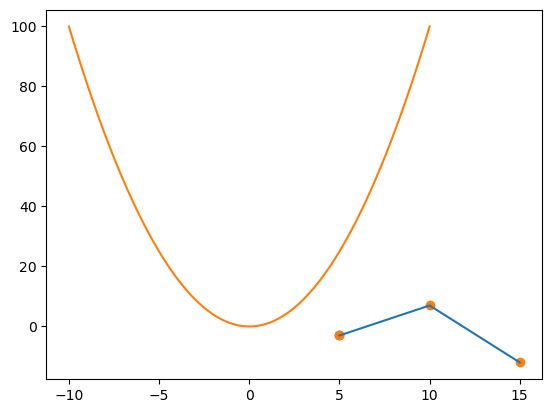

In [43]:
plt.scatter(5, -3)
plt.scatter([5, 10, 15], [-3, 7, -12])
plt.plot([5, 10, 15], [-3, 7, -12])
plt.plot(x, y(x))

### A multivariate function using a lambda function definition

Now we'll create a function that accepts two inputs; here, we'll use an inline or anonymous function syntax.

$$ f(x,y) = \sin(x) + \cos(y) $$

What is the value of f at x = 10, y = 7?


In [44]:
f = lambda x,y: np.sin(x) + np.cos(y) # translates to f(x,y) = sin(x) + cos(y)
f(10, 7)

np.float64(0.20988114345393483)

#### 3D plotting syntax (optional)

Create a 3D plot of the surface on the domain $x = [-10, 10]$ and $y = [-10,10]$; add labels and title.

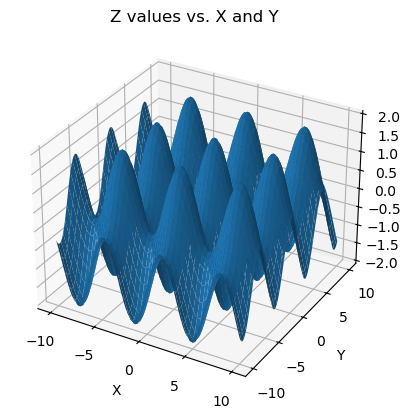

In [45]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#Data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y) #we're making a surface plot, so we create a grid of (x,y) pairs
Z = f(X,Y)  #generate the Z data on the meshgrid (X,Y) by evaluating f at each XY pair.

#Plot the surface.
surf = ax.plot_surface(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Z values vs. X and Y')
plt.show()

### Multiple arguments, and multiple returns

Now, let's create a function, $g(x,t)$, that accepts multiple inputs and returns multiple outputs - value(s) for y and values for z as a function of $(x,t)$.  We can look at this as a system of functions

\begin{align} 
    y(x,t) &= x^2t \\ 
    z(x,t) &= x\cos(t)
\end{align}
   
Calculate the values of y and z at x = 10, t = 7.

In [46]:
def g1(x,t):
    y = x**2*t
    z = x*np.cos(t)
    return y, z #this will return a tuple of (y, z) by default. 
                #A tuple is declared with and indicated by parentheses (). 
                #A tuple is an immutable array.
    return (y, z) #this will return a tuple of (y, z), same as default
    return [y, z] #this will return a list of [y, z]

In [48]:
print(g1(10, 7), '\n')

y, z = g1(10, 7) #when I have multiple returns, I can bind them to individual variables this way.
print(f'y = {y}, z = {z}')

(700, np.float64(7.539022543433046)) 

y = 700, z = 7.539022543433046


#### How about a contour plot (optional)?

Use the function $g(x,t)$ to generate values for both $y$ and $z$ on the domain $x = [0, 10]$ and $t = [0, 10]$; create a contour plot for $y(x,t)$ and $z(x,t)$.

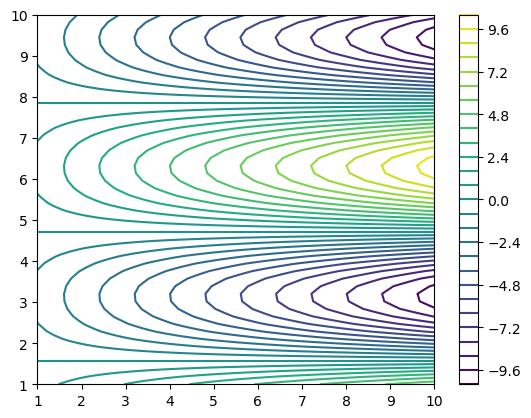

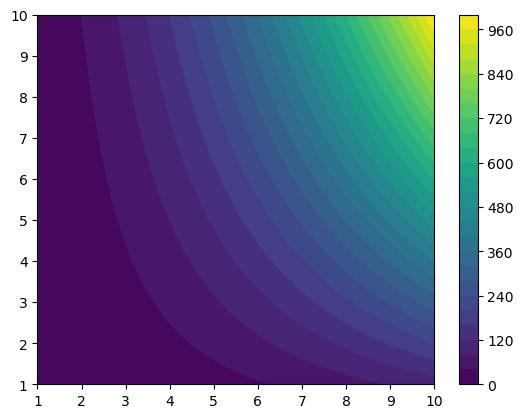

In [49]:
x = np.linspace(1,10,50)
t = np.linspace(1,10,50)
[X, T] = np.meshgrid(x,t)
Y, Z = g1(X,T)

plt.figure()
plt.contour(X, T, Z, levels = 25)
plt.colorbar()

plt.figure()
plt.contourf(X, T, Y, levels = 25)
plt.colorbar()

plt.show()

## You can create very complex functions...

Let's add some complexity to that same function $g(x,t)$.  It still will take two inputs $(x,t)$, but let's add to the outputs.  Let's have it return an 3x3 matrix of zeros; a 5x5 matrix of ones; and a character array that says IT'S A TRAP! 

Print the 5 outputs for the $(x,t)$ input pair $(1,1)$.

In [50]:
def g2(x,t):
    y = x**2*t
    z = x*np.cos(t)
    m1 = np.zeros((3,3))
    m2 = np.ones((5,5))
    s1 = "IT'S A TRAP"
    return y, z, m1, m2, s1

g2(1,1)

y, z, m1, m2, s1 = g2(1,1)

print(y, '\n')
print(z, '\n')
print(m1, '\n')
print(m2, '\n')
print(s1, '\n')

1 

0.5403023058681398 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

IT'S A TRAP 

